感知机
===
感知机是最简单的神经网络，它具备神经网络的必备因素

# 1.概述
![images](Images/02_001.png)<br/>
可以看出一个感知机有如下组成部分:


# 1.1.输入权值
一个感知器可以接收多个输入$(x_1,x_2,...,x_n | x_i \in R)$,每个输入上有一个权值$\omega_i \in R$，此外还有一个偏置项$b \in R$


## 1.2.激活函数
感知器的激活函数可以有很多选择，比如我们可以选择下面这个阶跃函数来作为激活函数.一般为符号函数即
$$
sign(x)=\begin{cases}
+1 & x \geq 0 \\\\
-1 & x < 0
\end{cases}
$$
或者传递函数不一定非要是sign，也可以是Step阶梯函数等等，这个取决于输出空间Y的取值
$$
step(x)=\begin{cases}
0 & x \leq 0 \\\\
1 & x > 0
\end{cases}
$$


## 1.3.输出
感知器的输出由下面这个公式来计算$y=f(\omega \bullet x + b)$可以看出，感知机是一种线性分类器，属于判别模型。感知机模型的假设空间是定义在特征空间的所有线性分类模型活线性分类器，即函数集合$\{f|f(x)=w \bullet x + b\}$


# 2.感知机学习模型
感知机的学习模型也是一种训练方法，其目的是修改神经网络的权值$\omega$和偏置b。根据上面的感知机模型，我们需要找到一系列的$\omega$以及偏置b，使得感知机能够很好的进行二分类
- 初始化$\omega=\{\omega_1,\omega_2,...,\omega_n\}$以及偏置b
- 计算实际结果$s = \sum_{i=1}^n\omega_ix_i+b$，然后带入某一类传递函数(符号函数或者阶梯函数)，得到实际结果$\alpha$
- 计算误差$\epsilon=y-\alpha$
- 如果$\epsilon=0$，则退出，否则往下
- 计算$w_i^{new}=\omega_1^{old}+\epsilon \bullet x_i$
- 计算$b^{new}=b^{old}+\epsilon$
- 执行第2步直到收敛

Logistic回归映射到感知机上，如下图所示

![images](Images/02_002.png)

# 3.举例说明
## 3.1.例子1-水果分类

![images](Images/02_003.png)

假设$w_1=0.3, w_2=-3, b=0$，
- 苹果的形状和颜色都是1，那么$s_1=w_1*x_1+w_2*x_2+b=0.3*1+(-3)*1+0=-2.7$，带入符号函数，得到实际结果$\alpha=-1$
- 误差$\epsilon=y-\alpha=1-(-1)=2$
- $w_1^{new}=w_1^{old}+\epsilon \bullet x_1=0.3 + 2 * 1 = 2.3$
- $w_2^{new}=w_2^{old}+\epsilon \bullet x_2=-3 + 2 * 1 = -1$
- $b^{new}=b^{old}+\epsilon=0+2=2$
- $s_2=w_1*x_1+w_2*x_2+b=2.3 * 1 + (-1) * 1 + 2 = 3.3$，带入符号函数，得到实际结果$\alpha=1$，正确
- 香蕉的形状和颜色都是-1,，那么$s_1=w_1*x_1+w_2*x_2+b=2.3*(-1)+(-1)*(-1)+2=0.7$，带入符号函数，得到实际结果$\alpha=1$
- 误差$\epsilon=y-\alpha=-1-1=-2$
- $w_1^{new}=w_1^{old}+\epsilon \bullet x_1=2.3 + (-2) * (-1) = 4.3$
- $w_2^{new}=w_2^{old}+\epsilon \bullet x_2=-1 + (-2) * (-1) = 1$
- $b^{new}=b^{old}+\epsilon=2-2=0$
- $s_2=w_1*x_1+w_2*x_2+b=4.3 * (-1) + 1 * (-1) + 0 = -5.3$，带入符号函数，得到实际结果$\alpha=-1$，正确

那么利用$w_1,w_2,b$来判断苹果，$s=w_1*x_1+w_2*x_2+b=4.3 * 1 + 1 * 1 + 0 = 5.3$，带入符号函数，得到实际结果1正确

## 3.2.例子2-用感知机实现and函数
我们设计一个感知器，让它来实现and运算。程序员都知道，and是一个二元函数（带有两个参数$x_1$和$x_2$），下面是它的真值表</br>
![images](Images/02_004.png)<br/>
为了计算方便，我们用0表示false，用1表示true,令而激活函数就是前面写出来的step函数，这时感知器就相当于and函数。我们验算一下：输入上面真值表的第一行，即$x_1=0,x_2=0$，根据公式有
$$
\begin{eqnarray}
y&=&f(\omega \bullet x + b)\\
&=&f(\omega_1x_1 + \omega_2x_2 + b)\\
&=&f(0.5 * 0 + 0.5 * 0 - 0.8)\\
&=&f(-0.8)=0
\end{eqnarray}
$$
这就是真值表第一行,其它行也可验证事实上，感知器不仅仅能实现简单的布尔运算。它可以拟合任何的线性函数，任何线性分类或线性回归问题都可以用感知器来解决。前面的布尔运算可以看作是二分类问题，即给定一个输入，输出0（属于分类0）或1（属于分类1）。and运算是一个线性分类问题，即可以用一条直线把分类0（false，红叉表示）和分类1（true，绿点表示）分开

# 4.感知机实例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

## 4.1.数据分析

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


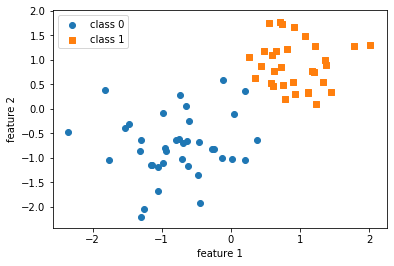

In [3]:
data = np.genfromtxt('data/perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

## 4.2.定义感知机模型

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((~cond) * x_2)

class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = custom_where(linear > 0., 1, 0).float()
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.size()[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1)
                self.weights += (errors * x[i]).view(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy

## 4.3.训练模型

In [5]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

Model parameters:
  Weights: tensor([[1.2734],
        [1.3464]])
  Bias: tensor([-1.])


## 4.4.预测模型

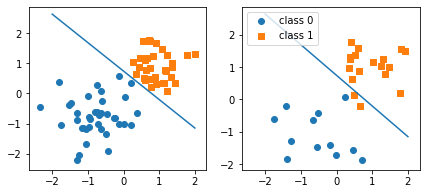

In [6]:
w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')